In [3]:
driver_name = '../'

In [5]:
import numpy as np
import pandas as pd
from pandas import concat

from collections import OrderedDict
import requests
from sklearn.externals import joblib

from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, DataStructs, Draw
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprint, GetMorganFingerprintAsBitVect
from rdkit.Chem.Draw import IPythonConsole
from rdkit import RDLogger
RDLogger.logger().setLevel(RDLogger.CRITICAL)

In [6]:
morgan_nb = joblib.load( driver_name + 'data/chembl_25/models/10uM/mNB_10uM_all.pkl')
classes = list( morgan_nb.targets )
len( classes )

C:\ProgramData\Anaconda3\envs\rdkit\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.19.1 when using version 0.22. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\ProgramData\Anaconda3\envs\rdkit\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.preprocessing.label module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\envs\rdkit\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.1 when using version 0.22. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\ProgramData\Anaconda3\envs\rd

1649

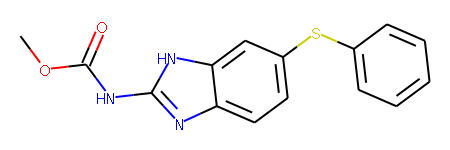

In [7]:
smiles = 'O[C@@H](CNCCCC#CC1=CC=C(C=C1)NC(=O)C=1C=C(C=CC1)S(=O)(=O)C=1C=C2C(=C(C=NC2=C(C1)C)C(=O)N)NC1=CC(=CC=C1)OC)C1=C2C=CC(NC2=C(C=C1)O)=O'
smiles = 'COC(=O)Nc3nc2ccc(Sc1ccccc1)cc2[nH]3'  # penbendazole
mol = Chem.MolFromSmiles(smiles)
mol

In [ ]:
bitinfo={}
fp = AllChem.GetMorganFingerprintAsBitVect( mol, 2, nBits=2048, bitInfo=bitinfo )
fps = np.zeros( len(fp), np.int32 )
DataStructs.ConvertToNumpyArray( fp, fps )

probas = list(morgan_nb.predict_proba( fps.reshape(1,-1) )[0])
predictions = pd.DataFrame( zip(classes, probas), columns=['id','proba'] )
top_preds = predictions.sort_values( by='proba', ascending=False ).head(10)
top_preds

In [ ]:
def fetch_WS(trgt):
    res = requests.get('https://www.ebi.ac.uk/chembl/api/data/target/{0}.json'.format(trgt))
    return (trgt, res.json()['pref_name'], res.json()['organism'])


target_list = []
for i,e in enumerate( top_preds[ 'id' ] ):
    target_list.append( fetch_WS(e) )


target_info = pd.DataFrame( target_list, columns =['id','name', 'organism'] )
pd.merge(top_preds, target_info)